<a href="https://colab.research.google.com/github/lukeawayne/colabconnect/blob/main/CreatingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing
from tkinter import *
from tkinter.ttk import *
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageOps, ImageFilter
from PIL import ImageTk as itk
import pydicom as dicom
from pydicom import dcmread
import matplotlib.pylab as plt
import os
import numpy as np

# creating main tkinter window/toplevel
w = Tk()
w.title("Image Upload for Analysis")
#pic = PhotoImage(file = 'WSUlogo.png')
#w.iconphoto(False, pic)
w.geometry("600x600")

#normalize data (could hurt data analysis when
#discrimminating bewteen pacemaker pixel value)
def dicompix(ds):
    #creates/normalizes data for image
    data = np.array(ds.pixel_array)
    x = np.max(data) / 255
    data = data / x
    data = np.clip(data, 0, 255)
    return data

#functions
def upload_file():
    global img
    # read in dicom file
    f_types = [('DICOM Files', '*.dcm')]
    filename = filedialog.askopenfilename(filetypes=f_types)
    ds = dcmread(filename)

    #call function to create normalized pixel array
    data = dicompix(ds)

    #create image for packing
    img = Image.fromarray(data)
    img = itk.PhotoImage(img)
    l2 = Button(w, image = img)
    l2.pack()


#create a label widget
l1 = Label(w, text = "Upload Image to View:", font=('times', 25))
l1.pack()

#button for uploading images
b1 = Button(w, text ='Open', command = lambda:upload_file())
b1.pack()

#to keep running until quit
mainloop()

In [ ]:
image_path = '/Users/lukelayman/MProject/CT_4/ZZZ.LUKE^CT4_ANON54361_CT_2023-08-16_082359_Onco.Chest_iDose.(3)_n333__00000/2.16.840.1.114362.1.12013697.26296774060.651887536.762.591.dcm'

In [ ]:
#sorting to correct order
def loadnsort(path):
    #load in paths
    path_list = []
    ds = os.listdir(path)
    for i in ds:
        path_list.append(path +"/"+i)
    #storing for sorting
    ds_list = []
    for i in path_list:
        ds = dcmread(i)
        ds_list.append(ds)
    #sort
    content_time = []
    for i in ds_list:
        content_time.append(i.ContentTime)
    sorted_list = sorted(content_time)
    #place file back in list
    dicom_sorted = []
    for j in sorted_list:
        for i in ds_list:
            if i.ContentTime == j:
                dicom_sorted.append(i)
            else:
                None
    return dicom_sorted


#function creating data
def dicompix(dicom):
    #creates/normalizes data for image
    ds = dicom
    ds = np.array(dicom.pixel_array)
    #x = np.max(ds) / 255
    #data = data / x
    #data = np.clip(data, 0, 255)
    return ds

#average didn't give the result I expeceted
# could easily just use np.max() to isolate the max value
def find_avg(x0):
    #initializing
    total_count = 0
    total_nums = 0
    max_val = 0
    #total count
    for i in range(len(x0)):
        for j in range(len(x0[i])):
            #summing up for avg
            val = x0[i][j]
            total_count += val
            total_nums += 1
            #finding max
            if val > max_val:
                max_val = val
    #finding ROI
    avgg = total_count / total_nums
    return avgg

#puts pixel array in list
def putpix(y):
    pixel_list = []
    for i in y:
        data = dicompix(i)
        pixel_list.append(data)
    return pixel_list

#directly finds the pacemaker
def find_pace(x0):
    #loop finding the pacemaker
    x0 = x0[15:]
    pace_list = []
    slice_location = []
    #starting at 15 to avoid plane table images
    slice_number = 14
    for i in x0:
        run = np.max(i)
        slice_number += 1
        #setting random threshold
        if run > 7000:
            pace_list.append(i)
            slice_location.append(slice_number)
    if len(pace_list) > 7:
        truth_state = 'Pacemaker/chemo port is present'
    else:
        truth_state = 'Pacemaker/chemo port is NOT present'

    return truth_state, slice_location

In [ ]:
# specify your image path to work with
# specific to my device
image4_path = '/Users/lukelayman/MProject/CT_4/ZZZ.LUKE^CT4_ANON54361_CT_2023-08-16_082359_Onco.Chest_iDose.(3)_n333__00000'
image6_path = '/Users/lukelayman/MProject/CT_6/ZZZ.LUKE^CT6_ANON91381_CT_2022-04-19_093435_Onco.ABC_DEEP.BREATH,.iDose.(3)_n121__00000'
image5_path = '/Users/lukelayman/MProject/CT_5/ZZZ.LUKE^CT5_ANON55582_CT_2022-08-17_141547_Onco.SRS.BRAIN_iDose.(3)_n379__00000'
image3_path = '/Users/lukelayman/MProject/CT_3/ZZZ.LUKE^CT3_ANON94272_CT_2023-04-24_134203_PET^PETCT.SKB.LUNG.(Adult)_CT_n263__00000'
image2_path = '/Users/lukelayman/MProject/CT_2/ZZZ.LUKE^CT2_ANON28823_CT_2023-08-21_102303_Onco.Breast_iDose.(3)_n129__00000'
image1_path = '/Users/lukelayman/MProject/CT_1/ZZZ.LUKE^CT1_ANON28264_CT_2023-08-24_133612_Onco.Chest_iDose.(3)_n146__00000'
imag_path = '/Users/lukelayman/MProject/CT_4/ZZZ.LUKE^CT4_ANON54361_CT_2023-08-16_082359_Onco.Chest_iDose.(3)_n333__00000/2.16.840.1.114362.1.12013697.26296774060.651887536.792.616.dcm'



#packing dicoms indiviual
#ds = os.listdir(image2_path)
#path1 = []
#for i in ds:
 #   path1.append(image2_path +"/"+i)

#sorting slices based on time
y1 = loadnsort(image1_path)
y2 = loadnsort(image2_path)
y3 = loadnsort(image3_path)
y4 = loadnsort(image4_path)
y5 = loadnsort(image5_path)
y6 = loadnsort(image6_path)

#creating normailized pixel array
p1 = putpix(y1)
p2 = putpix(y2)
p3 = putpix(y3)
p4 = putpix(y4)
p5 = putpix(y5)
p6 = putpix(y6)

In [ ]:
truthstate1, slices1 = find_pace(p1)
print('Set 1 Done')
truthstate2, slices2 = find_pace(p2)
print('Set 2 Done')
truthstate3, slices3 = find_pace(p3)
print('Set 3 Done')
truthstate4, slices4 = find_pace(p4)
print('Set 4 Done')
truthstate5, slices5 = find_pace(p5)
print('Set 5 Done')
truthstate6, slices6 = find_pace(p6)
print('Set 6 Done')

Set 1 Done
Set 2 Done
Set 3 Done
Set 4 Done
Set 5 Done
Set 6 Done


In [ ]:
print(truthstate1), print('There are',len(slices1),'images that could contain a pacemaker/chemo port')
print(truthstate2), print('There are',len(slices2),'images that could contain a pacemaker/chemo port')
print(truthstate3), print('There are',len(slices3),'images that could contain a pacemaker/chemo port')
print(truthstate4), print('There are',len(slices4),'images that could contain a pacemaker/chemo port')
print(truthstate5), print('There are',len(slices5),'images that could contain a pacemaker/chemo port')
print(truthstate6), print('There are',len(slices6),'images that could contain a pacemaker/chemo port')

Pacemaker/chemo port is NOT present
There are 6 images that could contain a pacemaker/chemo port
Pacemaker/chemo port is NOT present
There are 7 images that could contain a pacemaker/chemo port
Pacemaker/chemo port is NOT present
There are 0 images that could contain a pacemaker/chemo port
Pacemaker/chemo port is present
There are 20 images that could contain a pacemaker/chemo port
Pacemaker/chemo port is NOT present
There are 0 images that could contain a pacemaker/chemo port
Pacemaker/chemo port is present
There are 10 images that could contain a pacemaker/chemo port


(None, None)

#### Had an issue with the third set of dicom images, max value of the pacemaker only went to ~4000, not sure why but this is the reason of not finding them in the image set

128


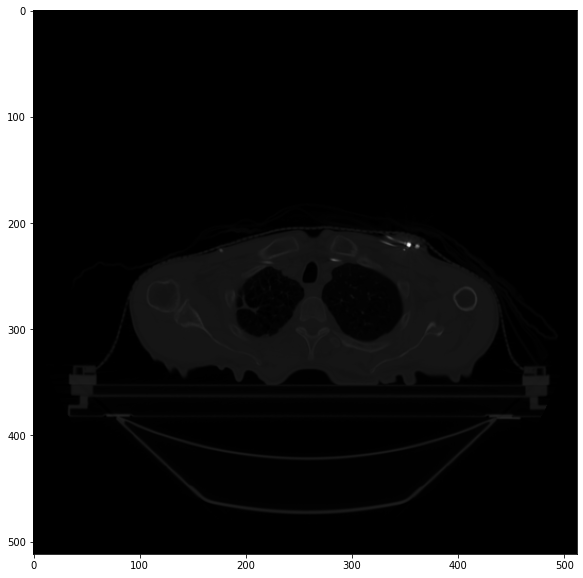

129


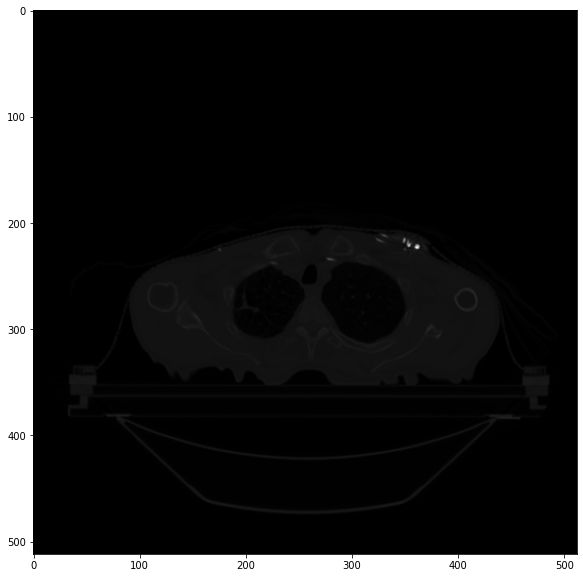

130


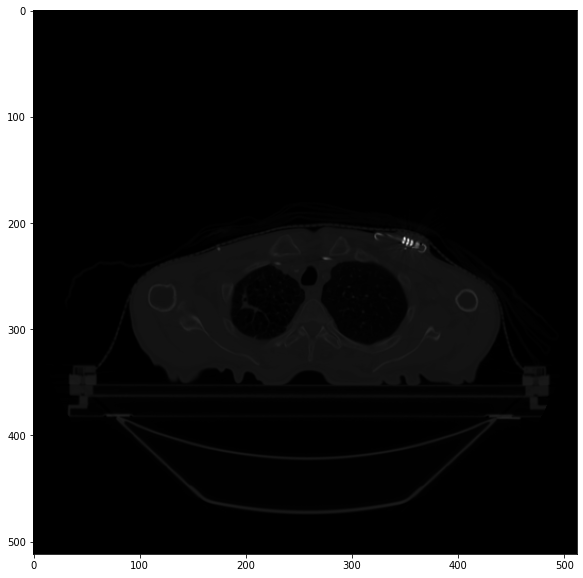

131


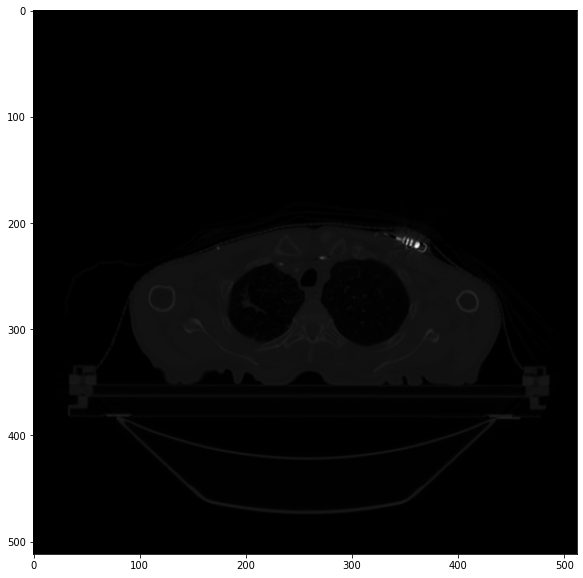

132


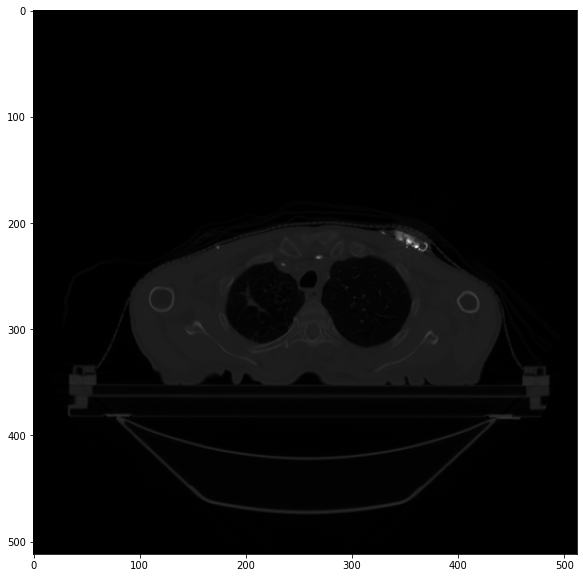

133


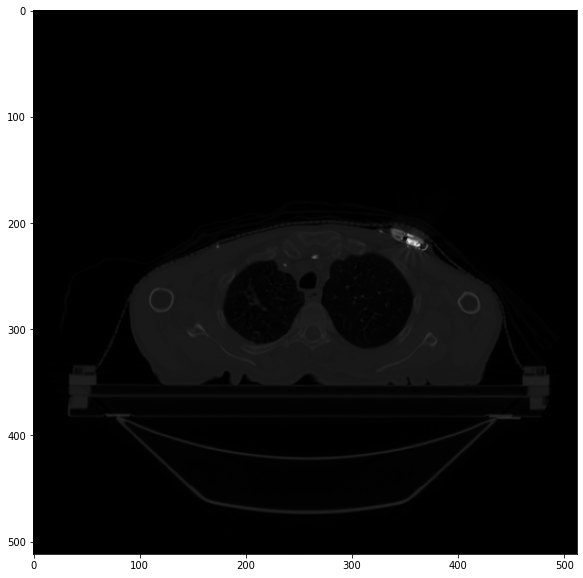

134


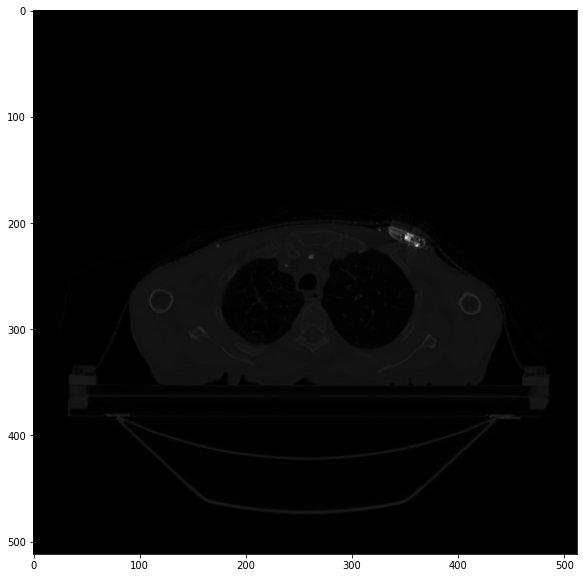

135


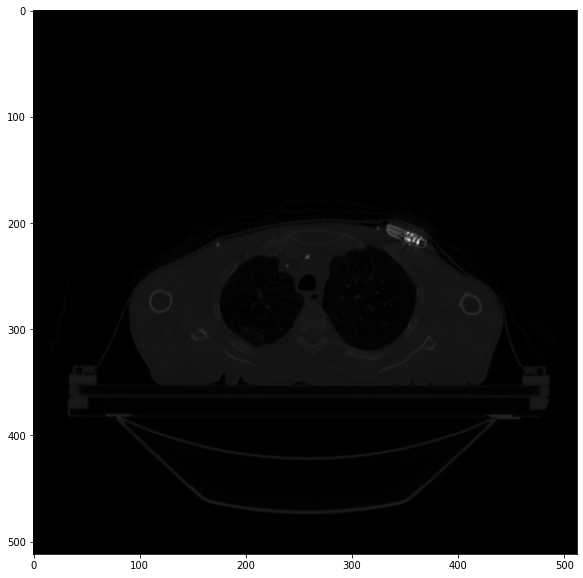

136


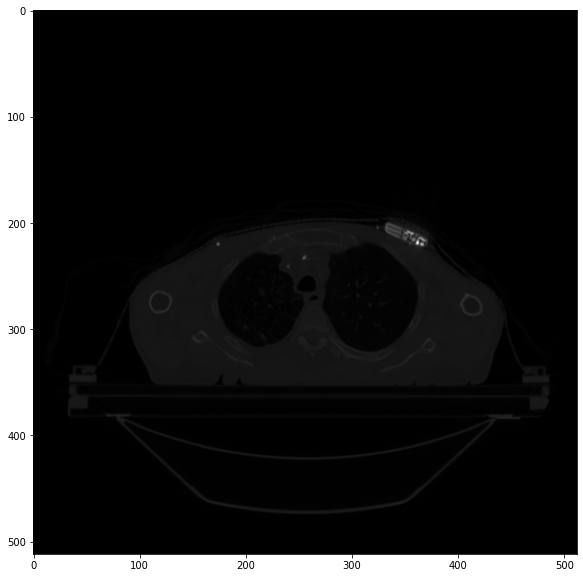

137


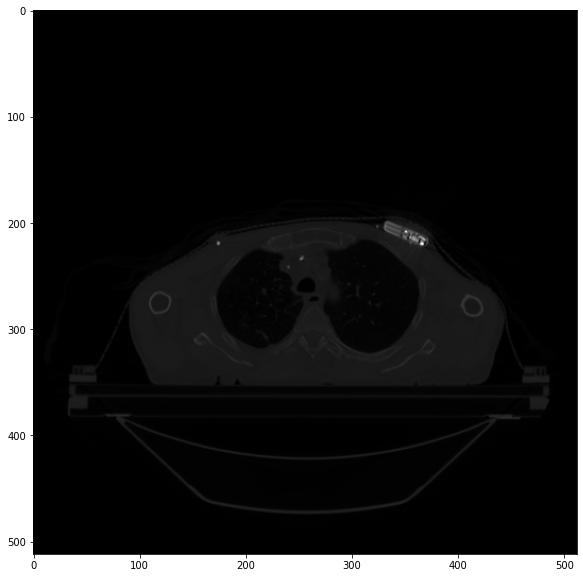

138


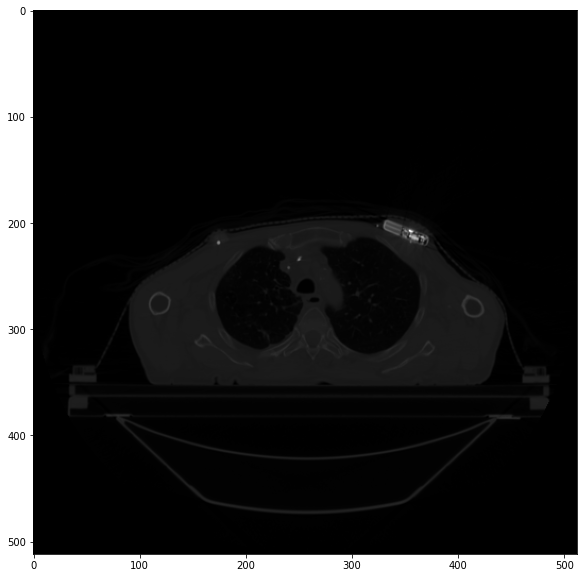

139


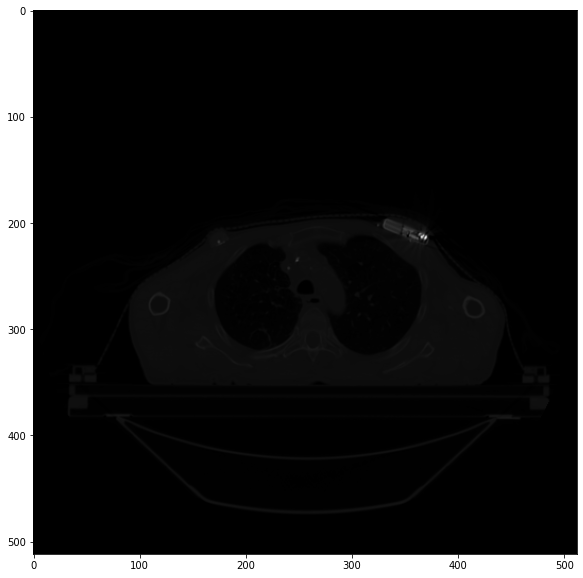

140


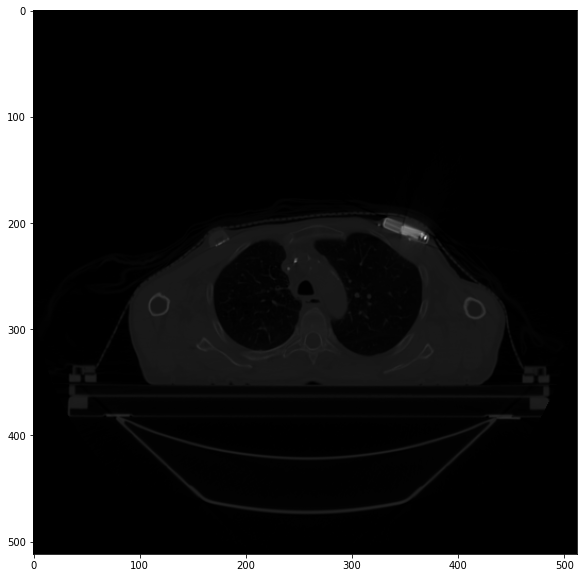

141


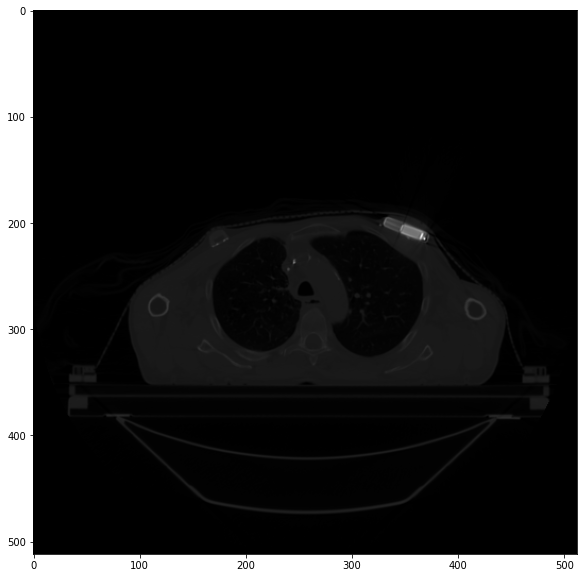

142


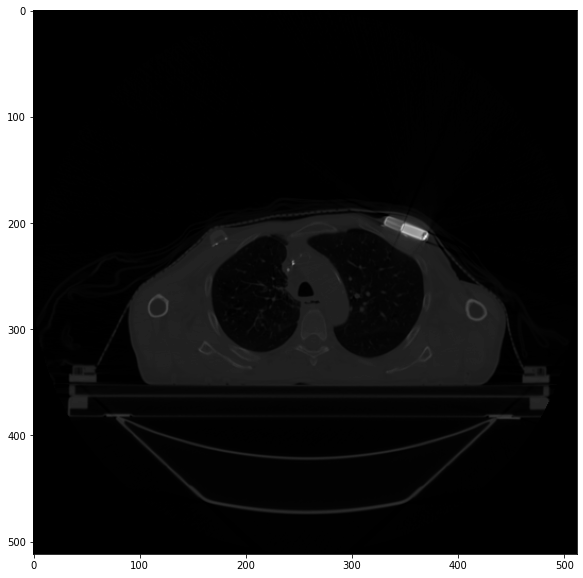

174


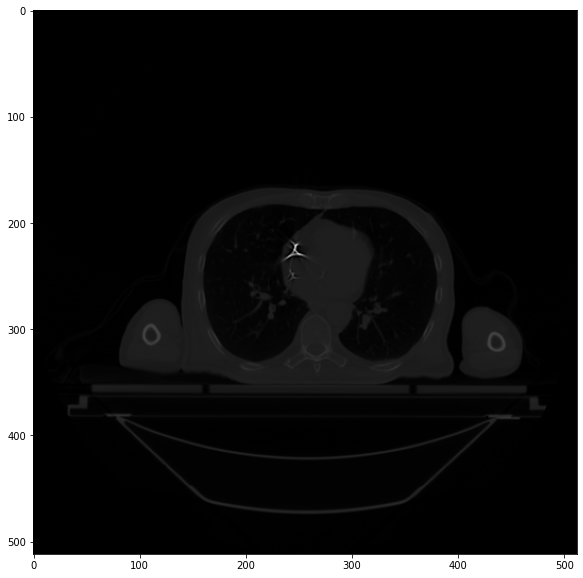

175


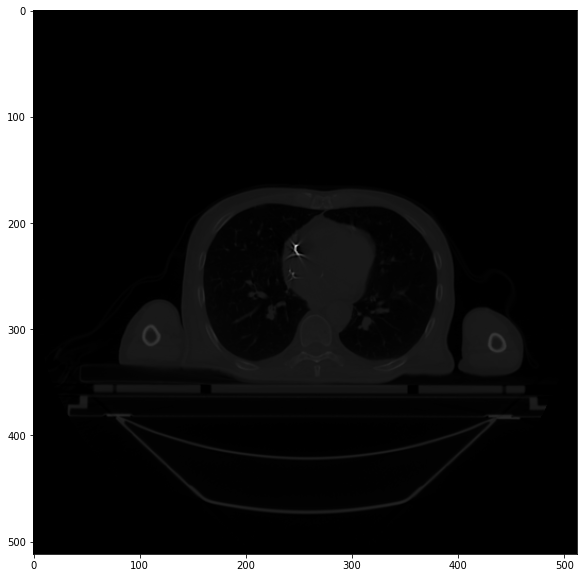

186


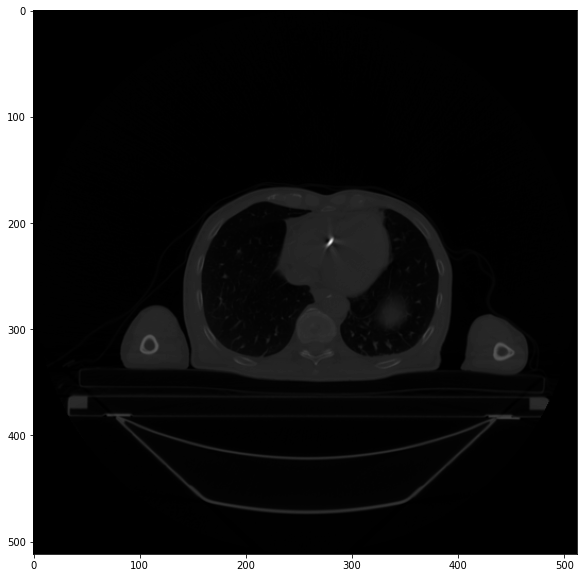

187


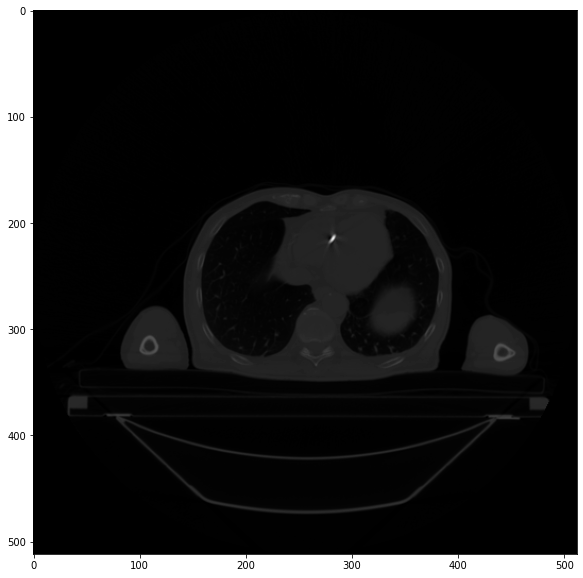

191


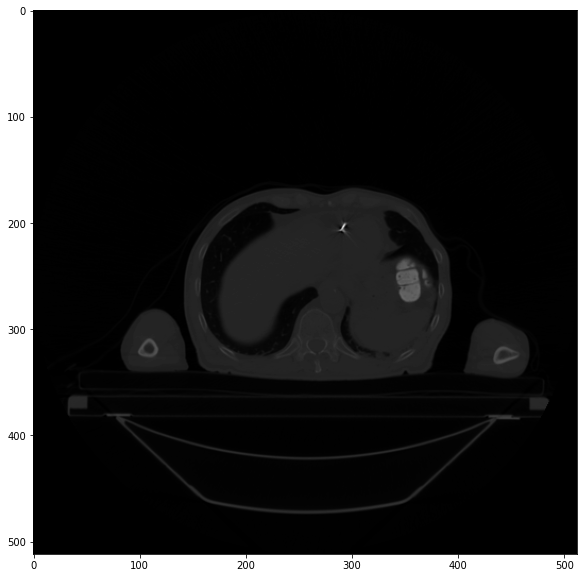

In [ ]:
for i in slices4:
    #print(i)
    plt.subplots(figsize=(10,10))
    plt.imshow(p4[i], cmap=plt.cm.gray)
    plt.show()

# Lists with pacemakers

In [ ]:
p1withchemo = p1[49:59]
p2withchemo = p2[47:57]
p3withpace = p3[185:202]
p4withpace = p4[128:149]
#p5withpace = p4[128:149]
#p6withpace = p4[128:149]

# Lists with Normal Images

In [ ]:
p1normal = p1[0:48]
p2normal = p2[47:57]
p3normal = p3[0:186] + p3[203:263]
p4normal = p4[0:129] + p4[150:333]
#p5withpace = p4[128:149]
#p6withpace = p4[128:149]

# Saving Images

#### Creates images as PNGs to run test cases, **not needed for this code**

##### for pacemakers

In [ ]:
for i in range(128,150):
    #print(i)
    pic_arr = p4[i].astype(np.uint8)
    image = Image.fromarray(pic_arr)
    image.save("p4-"+str(i)+".png")

    #plt.imshow(p1[i], cmap=plt.cm.gray)
    #plt.show()
    #break

##### for normals

In [ ]:
for i in range(len(p3normal)):
    #p1[i]

    pic_arr = p3normal[i].astype(np.uint8)
    image = Image.fromarray(pic_arr)
    image.save("p3-"+str(i)+".png")

    #plt.imshow(p1[i], cmap=plt.cm.gray)
    #plt.show()
    #break